In [449]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

# Load the input_train data
input_train = pd.read_csv('input_train.csv')

input_train['binaryClass'] = input_train['binaryClass'].astype('category').cat.codes.values
input_train['pregnant'] = input_train['pregnant'].astype('category').cat.codes.values

input_train= input_train.drop('I131 treatment', axis=1)



In [450]:
input_train.head(20)

,TT4,FTI,T3,TSH,T4U,pregnant,binaryClass
0,46,79,0.3,0.88,0.58,0,1
1,165,184,2.5,0.4,0.9,0,1
2,136,114,2.6,0.6,1.19,0,1
3,122,108,?,2.4,1.12,0,1
4,121,104,2.7,2.7,1.17,0,1
5,103,95,?,0.005,1.08,0,1
6,109,118,1.8,0.77,0.92,0,1
7,91,82,1.8,5.1,1.12,0,1
8,118,83,2.9,0.43,1.42,0,1
9,117,107,?,2.1,1.09,0,1


In [451]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

def remove_outliers_rows(df, z_threshold=3, target_column=None):
    """
    Remove rows with outliers from a DataFrame.

    Parameters:
    - df (DataFrame): Input DataFrame.
    - z_threshold (float): Z-score threshold for outlier detection. Defaults to 3.
    - target_column (str): Name of the target label column to exclude from outlier removal. Defaults to None.

    Returns:
    - DataFrame: DataFrame with rows containing outliers removed.
    """
    df_copy = df.copy()  # Create a copy of the DataFrame
    for column in df_copy.columns:
        if column == target_column:
            continue  # Skip outlier removal for the target class column
        
        # Convert column values to numeric, ignoring non-numeric values like '?'
        df_copy[column] = pd.to_numeric(df_copy[column], errors='coerce')
        
        # Calculate z-scores for the column values
        z_scores = zscore(df_copy[column])
        
        # Find indices of rows with z-score beyond the threshold
        outlier_indices = np.where(np.abs(z_scores) >= z_threshold)[0]
        
        # Drop rows with outliers
        df_copy = df_copy.drop(outlier_indices)
    
    return df_copy

# Example usage:
# Assuming df is your DataFrame and 'target_label_column' is the name of the target label column
input_train = remove_outliers_rows(input_train, target_column='binaryClass')


In [452]:
input_train.describe(include='all')

,TT4,FTI,T3,TSH,T4U,pregnant,binaryClass
count,2786.000000,2662.000000,2356.000000,2681.000000,2660.000000,2969.0,2969.000000
mean,107.133955,110.049850,1.988514,5.231013,0.986069,0.0,0.921522
std,33.785153,31.619954,0.787786,25.017009,0.181536,0.0,0.268967
min,2.000000,2.000000,0.050000,0.005000,0.250000,0.0,0.000000
25%,87.000000,93.000000,1.600000,0.500000,0.870000,0.0,1.000000
50%,103.000000,107.000000,2.000000,1.400000,0.970000,0.0,1.000000
75%,123.750000,124.000000,2.300000,2.700000,1.080000,0.0,1.000000
max,372.000000,312.000000,8.500000,530.000000,2.320000,0.0,1.000000


In [453]:
input_train.head(20)

,TT4,FTI,T3,TSH,T4U,pregnant,binaryClass
0,46.0,79.0,0.3,0.880,0.58,0,1
1,165.0,184.0,2.5,0.400,0.90,0,1
2,136.0,114.0,2.6,0.600,1.19,0,1
3,122.0,108.0,NaN,2.400,1.12,0,1
4,121.0,104.0,2.7,2.700,1.17,0,1
5,103.0,95.0,NaN,0.005,1.08,0,1
6,109.0,118.0,1.8,0.770,0.92,0,1
7,91.0,82.0,1.8,5.100,1.12,0,1
8,118.0,83.0,2.9,0.430,1.42,0,1
9,117.0,107.0,NaN,2.100,1.09,0,1


In [454]:


def impute_missing_with_means(dataset, column, binary_class):
    dataset[column] = dataset[column].replace('?', np.nan)  # Replace '?' with NaN
    mean_1 = dataset[column].loc[(~dataset[column].isnull()) & (dataset['binaryClass'] == 1)].astype(float).mean().round(2)
    mean_0 = dataset[column].loc[(~dataset[column].isnull()) & (dataset['binaryClass'] == 0)].astype(float).mean().round(2)
    dataset.loc[(dataset[column].isnull()) & (dataset['binaryClass'] == 0), column] = mean_0
    dataset.loc[(dataset[column].isnull()) & (dataset['binaryClass'] == 1), column] = mean_1

   
columns_to_impute = ['TT4', 'FTI', 'T3', 'TSH', 'T4U']


for column in columns_to_impute:
    impute_missing_with_means(input_train, column, 'binaryClass')


In [455]:
input_train.describe(include='all')

,TT4,FTI,T3,TSH,T4U,pregnant,binaryClass
count,2969.000000,2969.000000,2969.000000,2969.000000,2969.000000,2969.0,2969.000000
mean,107.285864,110.126925,1.992920,4.913717,0.985630,0.0,0.921522
std,32.753518,30.103372,0.704132,23.791990,0.171847,0.0,0.268967
min,2.000000,2.000000,0.050000,0.005000,0.250000,0.0,0.000000
25%,88.000000,94.000000,1.700000,0.600000,0.890000,0.0,1.000000
50%,105.000000,110.000000,2.040000,1.600000,0.980000,0.0,1.000000
75%,122.000000,121.000000,2.200000,2.500000,1.060000,0.0,1.000000
max,372.000000,312.000000,8.500000,530.000000,2.320000,0.0,1.000000


In [456]:
input_train.head(20)

,TT4,FTI,T3,TSH,T4U,pregnant,binaryClass
0,46.00,79.00,0.30,0.880,0.58,0,1
1,165.00,184.00,2.50,0.400,0.90,0,1
2,136.00,114.00,2.60,0.600,1.19,0,1
3,122.00,108.00,2.04,2.400,1.12,0,1
4,121.00,104.00,2.70,2.700,1.17,0,1
5,103.00,95.00,2.04,0.005,1.08,0,1
6,109.00,118.00,1.80,0.770,0.92,0,1
7,91.00,82.00,1.80,5.100,1.12,0,1
8,118.00,83.00,2.90,0.430,1.42,0,1
9,117.00,107.00,2.04,2.100,1.09,0,1


In [457]:
input_train = input_train.dropna()

In [458]:
input_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2969 entries, 0 to 3016
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TT4          2969 non-null   float64
 1   FTI          2969 non-null   float64
 2   T3           2969 non-null   float64
 3   TSH          2969 non-null   float64
 4   T4U          2969 non-null   float64
 5   pregnant     2969 non-null   int8   
 6   binaryClass  2969 non-null   int8   
dtypes: float64(5), int8(2)
memory usage: 145.0 KB


In [459]:
input_train[input_train=='?'].count()

TT4            0
FTI            0
T3             0
TSH            0
T4U            0
pregnant       0
binaryClass    0
dtype: int64

In [460]:
input_train.dropna()
input_train.drop_duplicates()

,TT4,FTI,T3,TSH,T4U,pregnant,binaryClass
0,46.0,79.0,0.30,0.88,0.58,0,1
1,165.0,184.0,2.50,0.40,0.90,0,1
2,136.0,114.0,2.60,0.60,1.19,0,1
3,122.0,108.0,2.04,2.40,1.12,0,1
4,121.0,104.0,2.70,2.70,1.17,0,1
...,...,...,...,...,...,...,...
3012,113.0,124.0,2.30,0.47,0.91,0,1
3013,110.0,101.0,2.70,2.40,1.09,0,1
3014,104.0,97.0,2.20,1.96,1.07,0,1
3015,128.0,129.0,1.60,0.50,0.99,0,1


In [461]:
input_train['binaryClass'].value_counts()

binaryClass
1    2736
0     233
Name: count, dtype: int64

In [462]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid including sampling_strategy for SMOTE
param_grid = {
    'smote__k_neighbors': [5, 10, 15, 20],
    'smote__sampling_strategy': ['auto', 0.75, 1.0]
}

# Define the KNN classifier
knn = KNeighborsClassifier()

# Define the SMOTE sampler
smote = SMOTE()

# Define the pipeline with SMOTE and KNN
pipeline = Pipeline([
    ('smote', smote),
    ('knn', knn)
])

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=10, scoring='accuracy')
grid_search.fit(input_train.drop('binaryClass', axis=1), input_train['binaryClass'])

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)


Best parameters: {'smote__k_neighbors': 15, 'smote__sampling_strategy': 0.75}


In [463]:
# Create the SMOTE object
smote = SMOTE(k_neighbors=best_params['smote__k_neighbors'], sampling_strategy=best_params['smote__sampling_strategy'])

# Apply SMOTE to balance the data
X_resampled, y_resampled = smote.fit_resample(input_train.drop('binaryClass', axis=1), input_train['binaryClass'])

# Create a new balanced dataframe
balanced_data = pd.DataFrame(X_resampled, columns=input_train.drop('binaryClass', axis=1).columns)
balanced_data['binaryClass'] = y_resampled


In [464]:
from imblearn.under_sampling import RandomUnderSampler

# Create an instance of the RandomUnderSampler
undersampler = RandomUnderSampler()

# Apply undersampling to the balanced data
X_undersampled, y_undersampled = undersampler.fit_resample(balanced_data.drop('binaryClass', axis=1), balanced_data['binaryClass'])

# Create a new undersampled dataframe
balanced_data  = pd.DataFrame(X_undersampled, columns=balanced_data.drop('binaryClass', axis=1).columns)
balanced_data['binaryClass']  = y_undersampled

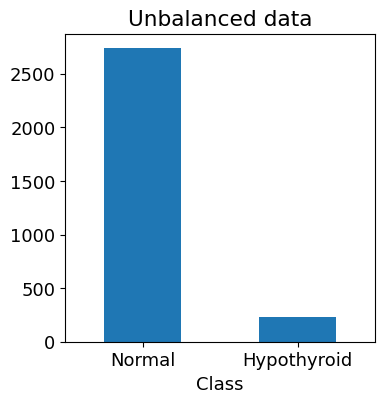

In [465]:
plt.rcParams.update({'font.size': 13})
# include figure 
plt.figure(figsize=(4, 4))
input_train['binaryClass'].value_counts().plot(kind='bar', title='Count (output)')
plt.xlabel('Class')
plt.title('Unbalanced data')
plt.xticks([0, 1], ['Normal', 'Hypothyroid'], rotation=0)
# save fig eps format
fig = plt.gcf()
#fig.savefig('unbalanced_data.eps', format='eps', dpi=600, bbox_inches='tight')

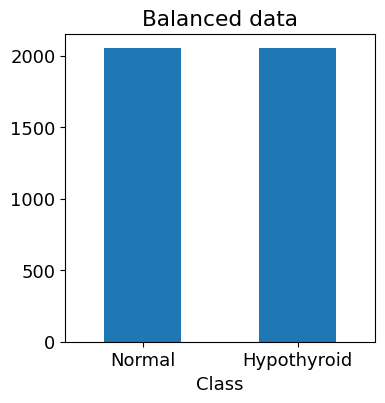

In [466]:
plt.rcParams.update({'font.size': 13})
# include figure 
plt.figure(figsize=(4, 4))
balanced_data['binaryClass'].value_counts().plot(kind='bar', title='Count (output)')
plt.xlabel('Class')
plt.title('Balanced data')
plt.xticks([0, 1], ['Normal', 'Hypothyroid'], rotation=0)
# save fig eps format
fig = plt.gcf()
#fig.savefig('unbalanced_data.eps', format='eps', dpi=600, bbox_inches='tight')

In [467]:
input_train[['TT4', 'FTI', 'T3', 'TSH', 'T4U']].describe()

,TT4,FTI,T3,TSH,T4U
count,2969.000000,2969.000000,2969.000000,2969.000000,2969.000000
mean,107.285864,110.126925,1.992920,4.913717,0.985630
std,32.753518,30.103372,0.704132,23.791990,0.171847
min,2.000000,2.000000,0.050000,0.005000,0.250000
25%,88.000000,94.000000,1.700000,0.600000,0.890000
50%,105.000000,110.000000,2.040000,1.600000,0.980000
75%,122.000000,121.000000,2.200000,2.500000,1.060000
max,372.000000,312.000000,8.500000,530.000000,2.320000


In [468]:
balanced_data[['TT4', 'FTI', 'T3', 'TSH', 'T4U']].describe()


,TT4,FTI,T3,TSH,T4U
count,4104.000000,4104.000000,4104.000000,4104.000000,4104.000000
mean,91.370367,92.918043,1.768381,19.308496,0.998319
std,37.239817,35.754071,0.708492,49.098543,0.164194
min,2.000000,2.000000,0.050000,0.005000,0.250000
25%,71.000000,73.000000,1.400000,1.400000,0.900000
50%,92.000000,96.000000,1.806599,6.299278,0.990000
75%,111.383981,113.290000,2.100000,12.851909,1.080000
max,372.000000,312.000000,7.600000,530.000000,2.320000


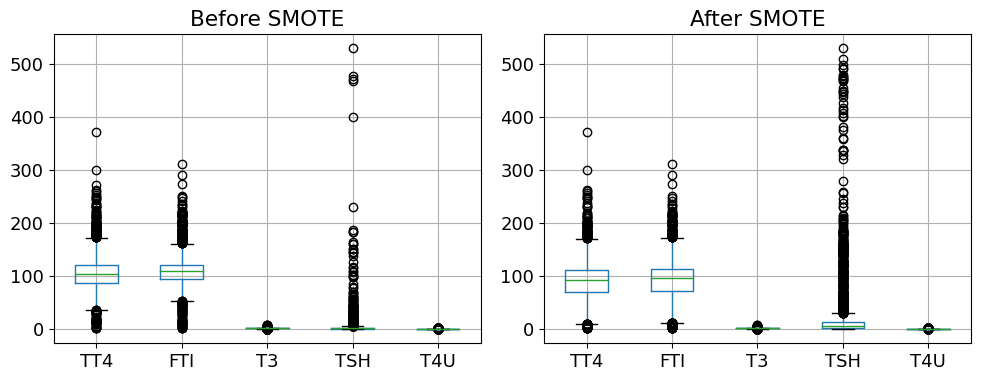

In [469]:

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot boxplot of features before SMOTE
input_train__plot = input_train[['TT4', 'FTI', 'T3', 'TSH', 'T4U']]
input_train__plot.boxplot(ax=axes[0])
axes[0].set_title('Before SMOTE')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Plot boxplot of features after SMOTE
input_train_plot = balanced_data[['TT4', 'FTI', 'T3', 'TSH', 'T4U']]
input_train_plot.boxplot(ax=axes[1])
axes[1].set_title('After SMOTE')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()


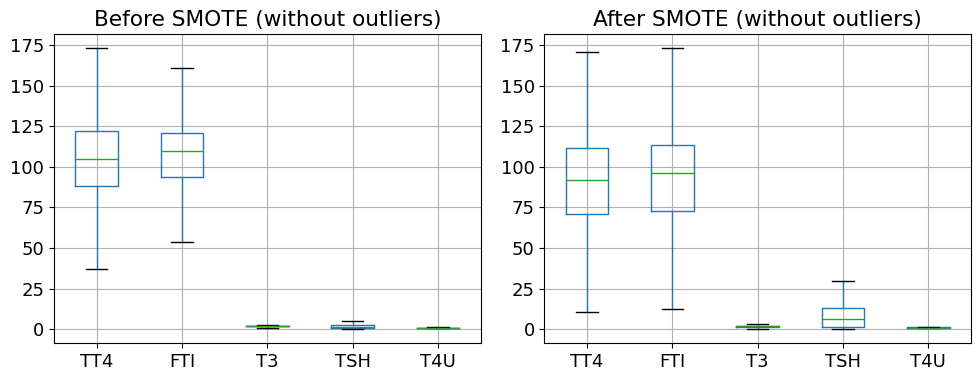

In [470]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot boxplot of features before SMOTE without outliers
input_train__plot.boxplot(ax=axes[0], showfliers=False)
axes[0].set_title('Before SMOTE (without outliers)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Plot boxplot of features after SMOTE without outliers
input_train_plot.boxplot(ax=axes[1], showfliers=False)
axes[1].set_title('After SMOTE (without outliers)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()


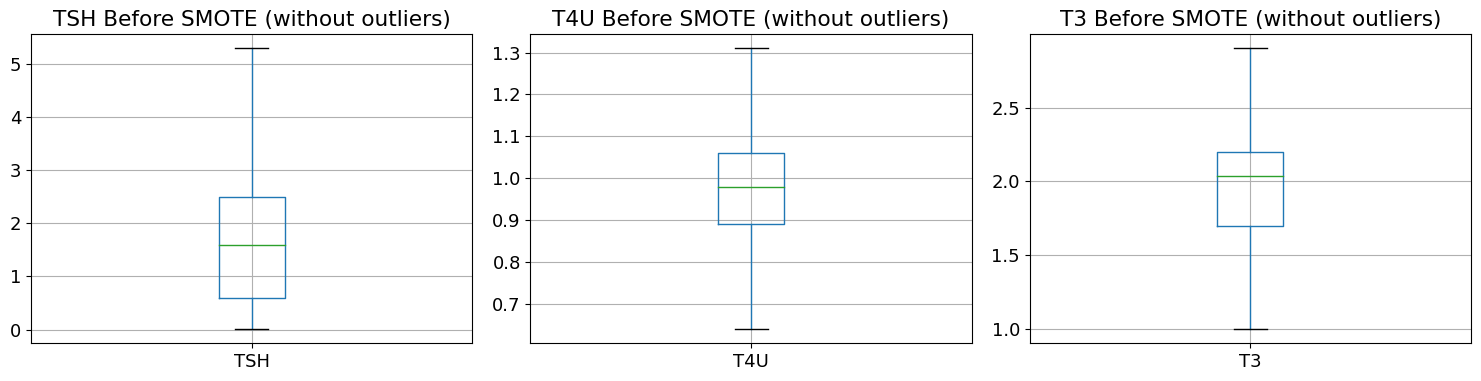

In [471]:

# Create subplots for each feature
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot boxplot of 'TSH' feature before SMOTE without outliers
input_train__plot[['TSH']].boxplot(ax=axes[0], showfliers=False)
axes[0].set_title('TSH Before SMOTE (without outliers)')
axes[0].set_xticklabels(['TSH'], rotation=0)

# Plot boxplot of 'T4U' feature before SMOTE without outliers
input_train__plot[['T4U']].boxplot(ax=axes[1], showfliers=False)
axes[1].set_title('T4U Before SMOTE (without outliers)')
axes[1].set_xticklabels(['T4U'], rotation=0)

# Plot boxplot of 'T3' feature before SMOTE without outliers
input_train__plot[['T3']].boxplot(ax=axes[2], showfliers=False)
axes[2].set_title('T3 Before SMOTE (without outliers)')
axes[2].set_xticklabels(['T3'], rotation=0)

plt.tight_layout()
plt.show()


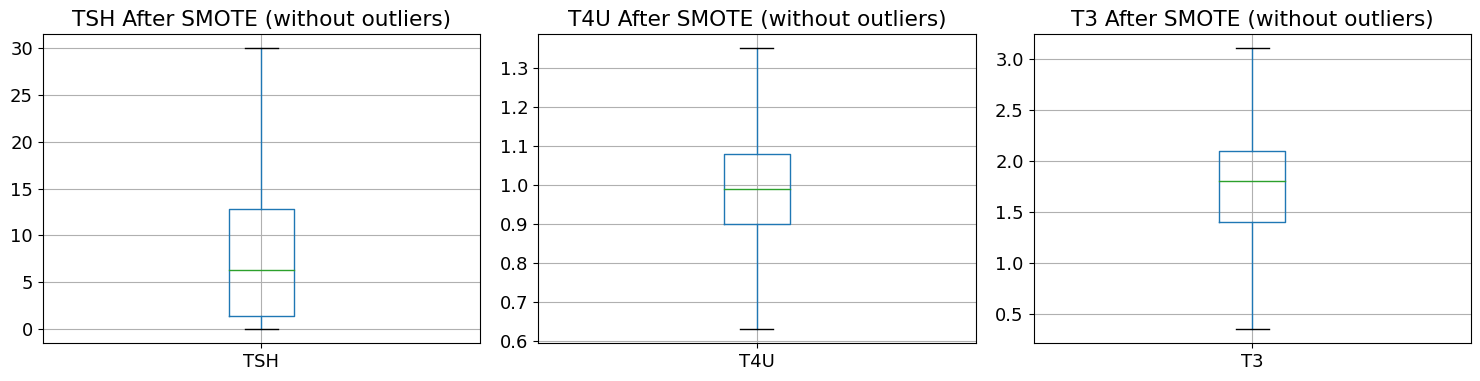

In [472]:
# Create subplots for each feature
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot boxplot of 'TSH' feature after SMOTE without outliers
input_train_plot[['TSH']].boxplot(ax=axes[0], showfliers=False)
axes[0].set_title('TSH After SMOTE (without outliers)')
axes[0].set_xticklabels(['TSH'], rotation=0)

# Plot boxplot of 'T4U' feature after SMOTE without outliers
input_train_plot[['T4U']].boxplot(ax=axes[1], showfliers=False)
axes[1].set_title('T4U After SMOTE (without outliers)')
axes[1].set_xticklabels(['T4U'], rotation=0)

# Plot boxplot of 'T3' feature after SMOTE without outliers
input_train_plot[['T3']].boxplot(ax=axes[2], showfliers=False)
axes[2].set_title('T3 After SMOTE (without outliers)')
axes[2].set_xticklabels(['T3'], rotation=0)

plt.tight_layout()
plt.show()